In [1]:
%cd /qbio/nest/alpaca/Tutorial

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#ID of Mirlet7d: ENSMUSG00000065453
#We should get data that are aligned to
#chr13:48536009 - 48536050
#CTCC is 48536059 - 48536062

In [4]:
#Generating a list that contains data of reads that are aligned to MirLet7d

def makedata(addr):

    with open(addr) as file_data:

        result1 = []
        for line in file_data:
            if line.startswith('@'):
                continue
            else:
                tmp1 = line.split('\t')
                tmp1 = [tmp1[3], tmp1[5], tmp1[9]]
                result1.append(tmp1)
        
        
        #for i in result1:
            
            
         #   if i in j:
                
          #  else:
                
        
        return result1


In [5]:
Aligned_data = makedata('./AlignedData_with_genome/Lin28a-CLIP-35L33G/Mirlet7d.sam')
print(len(Aligned_data))
#Element of Aligned_data:
#['256', 'ENSMUSG00000065453.1', '40', '3', '22M1D41M15S', 'AGGGCAGAGA...']

134


In [16]:
def classify(data):
    result = {}
    for i in data:
        #print(i)

        pos = int(i[0])
        cigar_raw = i[1]
        cigar = []
        seq = i[2]
        tmp = 0
        
        for i in range(len(cigar_raw)):
            if cigar_raw[i] == 'S' or cigar_raw[i] == 'M' or cigar_raw[i] == 'D':
                cigar.append(cigar_raw[tmp:i+1])
                tmp = i+1
                
        #print(cigar)
                
        keypos = pos
        
        while len(cigar) != 0:
            if cigar[0][-1] == 'M':
                num = 0
                length = int(cigar[0][:-1])
                for j in range(length):
                    if keypos not in result:
                        result[keypos] = [seq[j]]
    
                    else:
                        result[keypos] = result[keypos]+[seq[j]]
                    #print(result[keypos])
                    
                    keypos += 1
                    num += 1
                
                seq = seq[num:]
                cigar.pop(0)
                
            elif cigar[0][-1] == 'D':      #This means deletion
                num = 0
                length = int(cigar[0][:-1])

                for j in range(length):
                    if keypos not in result:
                        result[keypos] = ['D']
    
                    else:
                        result[keypos] = result[keypos]+['D']
                    #print(result[keypos])
                    
                    keypos += 1
                    num += 1
                    cigar.pop(0)
                
            elif cigar[0][-1] == 'S':                          #This means soft clipping
                num = int(cigar[0][:-1])
                #print(num)
                seq = seq[num:]
                #print(seq)
                cigar.pop(0)
                #print(cigar)
                
            elif cigar[0][-1] == ''
    #print(result)
    
    return result
        

            
        
        

In [17]:
res = classify(Aligned_data)
#print(res.keys())
#res = classify([['48536015', '17S60M1S', 'ATTGATGGTGCCTACAGAAGGCCCTAAGAAAGGCAGCAGGTCGTATAGTTAACTCGTTGTGGGCAAAATCTCTGCCCN']])
#print(res)
#print(len('TTGATGGTGCCTACAGTAAGGCCCTAAGAAAGGCAGCAGGTCGTATAGTTAACTCTTTGTGGGCAAAATCTCTGCCCT'))

#a = 'ATTGATGGTGCCTACAGAAGGCCCTAAGAAAGGCAGCAGGTCGTATAGTTAACTCGTTGTGGGCAAAATCTCTGCCCN'
#print(a[77:])

In [8]:
#Calculate shannon's entropy    

def shannon(data):
    result = {}
    for i in data:
        A = 0
        C = 0
        T = 0
        G = 0
        SE = 0
        
        size = len(data[i])
        for j in data[i]:
            if j == 'A':
                A += 1
            elif j == 'C':
                C += 1
            elif j == 'G':
                G += 1
            elif j == 'T':
                T += 1
            else:
                A += 0.25
                C += 0.25
                T += 0.25
                G += 0.25
                
        pA = A/size
        pC = C/size
        pG = G/size
        pT = T/size
        prob = [pA, pC, pG, pT]
        
        for p in prob:
            if p != 0:
                SE -= p*np.log2(p)
        
        result[i] = SE
                
    return result

In [9]:
Data = shannon(res)
#Data

In [10]:
#Make dictionary that contains reference sequence of Mirlet7d
#Between position 48,536,009-48,536,116

reference = {}
refseq = 'TACAGTAAGGCCCTAAGAAAGGCAGCAGGTCGTATAGTTAACTCCTTGTGGGCAAAATCTCTGCCCTAAAACTATGCAACCTACTACCTCTTCCTAGGAACCCATTTT'
position = 48536009
for i in range(len(refseq)):
    reference[position] = refseq[i]
    position += 1
    
#print(reference)

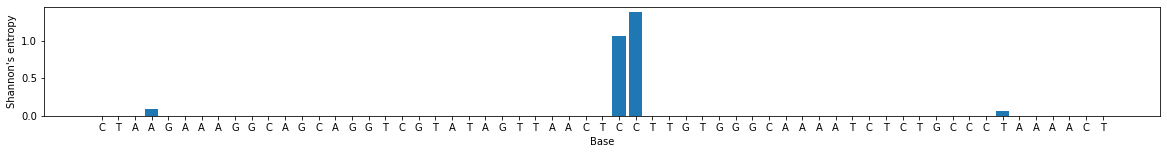

/qbio/nest/alpaca/Tutorial/Figures


<Figure size 1440x144 with 0 Axes>

In [12]:
#Plot figure S2A

bases = []
SEs = []

for i in reference:
    bases.append(reference[i])
    SEs.append(Data[i])

bases = bases[12:-35]
SEs = SEs[12:-35]


x = range(len(bases))
plt.rcParams["figure.figsize"] = (20,2)
plt.bar(x, SEs)
plt.xticks(x, bases)
plt.xlabel('Base ()')
plt.ylabel('Shannon\'s entropy')
plt.show()

%cd /qbio/nest/alpaca/Tutorial/Figures
plt.savefig('Figure S2A.png', dpi=500)


